In [ ]:
pip install librosa scipy

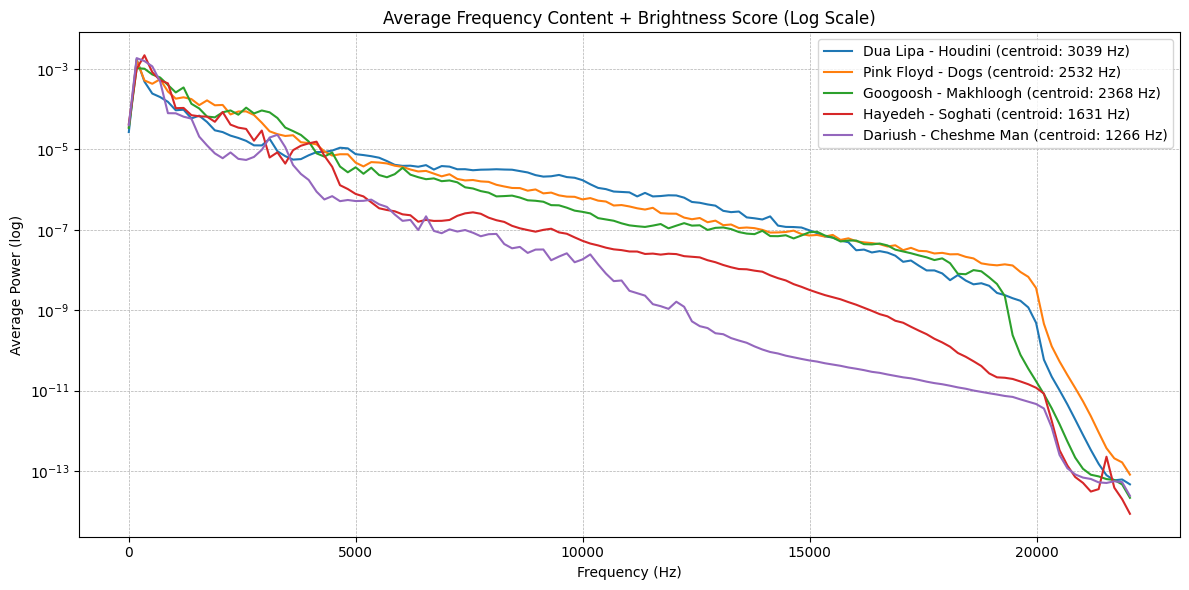

🔆 Spectral Centroid (Brightness) per Track:
Dua Lipa - Houdini                            :  3039 Hz
Pink Floyd - Dogs                             :  2532 Hz
Googoosh - Makhloogh                          :  2368 Hz
Hayedeh - Soghati                             :  1631 Hz
Dariush - Cheshme Man                         :  1266 Hz


In [30]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import os

def compute_avg_spectrum_and_centroid(file_path):
    y, sr = librosa.load(file_path, sr=None, mono=True)
    
    # Normalize by RMS loudness
    rms = np.sqrt(np.mean(y**2))
    if rms > 0:
        y = y / rms

    # Spectrogram-based summary
    f, t, Sxx = spectrogram(y, fs=sr)
    avg_power = np.mean(Sxx, axis=1)

    # Spectral centroid (brightness)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    mean_centroid = np.mean(centroid)

    return f, avg_power, mean_centroid

# Audio file paths
audio_files = [
    "/Users/hamidrezakeshavarz/Downloads/Dua Lipa - Houdini.mp3",
    "/Users/hamidrezakeshavarz/Downloads/Pink Floyd - Dogs.mp3",
    "/Users/hamidrezakeshavarz/Downloads/Googoosh - Makhloogh.mp3",
    "/Users/hamidrezakeshavarz/Downloads/Hayedeh - Soghati.mp3",
    "/Users/hamidrezakeshavarz/Downloads/Dariush - Cheshme Man.mp3",
]

# Use a color map
colors = plt.cm.tab10.colors

# Prepare the figure
plt.figure(figsize=(12, 6))

# Track brightness values
brightness_scores = {}

# Plot each track
for i, file_path in enumerate(audio_files):
    label = os.path.basename(file_path).split(".mp3")[0]
    freqs, avg_power, centroid = compute_avg_spectrum_and_centroid(file_path)
    brightness_scores[label] = centroid
    plt.plot(freqs, avg_power, label=f"{label} (centroid: {int(centroid)} Hz)", color=colors[i % len(colors)])

# Styling
plt.yscale("log")
plt.title("Average Frequency Content + Brightness Score (Log Scale)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Power (log)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print sorted brightness scores
print("🔆 Spectral Centroid (Brightness) per Track:")
for track, value in sorted(brightness_scores.items(), key=lambda x: -x[1]):
    print(f"{track:<45} : {int(value):>5} Hz")
